### Madden-Julian Oscillation (MJO) Metrics

This notebook demonstrates the basic use of the MJO metrics driver. It is assumed that you have run the download notebook to acquire the sample data before running this demo.

Scientific information about the MJO metrics is available through the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/mjo).

First we load the demo directory choices:

In [1]:
from user_choices import demo_data_directory, demo_output_directory

The `--help` flag is available to provide more information on the mjo_metrics_driver:

In [2]:
%%bash
mjo_metrics_driver.py --help

usage: mjo_metrics_driver.py [-h] [--parameters PARAMETERS]
                             [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                             [--results_dir RESULTS_DIR]
                             [--reference_data_path REFERENCE_DATA_PATH]
                             [--modpath MODPATH] [--mip MIP] [--exp EXP]
                             [--frequency FREQUENCY] [--realm REALM]
                             [--reference_data_name REFERENCE_DATA_NAME]
                             [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                             [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                             [--varModel VARMODEL]
                             [--ObsUnitsAdjust OBSUNITSADJUST]
                             [--ModUnitsAdjust MODUNITSADJUST] [--units UNITS]
                             [--osyear OSYEAR] [--msyear MSYEAR]
                             [--oeyear OEYEAR] [--meyear MEYEAR]
                             [--modnames 

### Basic Use

The MJO driver can read a parameter file to load user settings. A basic parameter file is shown here:

In [3]:
with open("basic_mjo_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

case_id = 'Ex1'
realization = 'r6i1p1'

# ROOT PATH FOR MODELS CLIMATOLOGIES
modnames = ['GISS-E2-H']
modpath = 'demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_%(model)_historical_r6i1p1_20000101-20051231.nc'
varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
units = 'mm/d'
msyear = 2000
meyear = 2002

# ROOT PATH FOR OBSERVATIONS
reference_data_name = 'GPCP-IP'
reference_data_path = 'demo_data/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc'
varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
osyear = 1998
oeyear = 1999

# DIRECTORY WHERE TO PUT RESULTS
results_dir = 'demo_output/mjo/%(case_id)'

# MISCELLANEOUS
nc_out = False
plot = False  # Create map graphics
update_json = False



This parameter file can be passed to the mjo driver via the command line:
```
mjo_metrics_driver.py -p basic_mjo_param.py
```

This example is run as a subprocess in the next cell.

In [4]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py

includeOBS: True
models: ['GISS-E2-H']
realization:  r6i1p1
demo_output/mjo/Ex1
demo_output/mjo/Ex1
demo_output/mjo/Ex1
CMEC: False
debug:  False
parallel: False
 -----  obs  ---------------------
 ---  GPCP-IP  ---
demo_data/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
 --  NDJFMA  --
1998
chk: year: 1998
ewr:  2.9209664554421777
east power:  0.016600374830362644
west power:  0.0056831788668554465
 --  MJJASO  --
1998
chk: year: 1998
ewr:  2.8143052121039043
east power:  0.0012753398058403514
west power:  0.0004531632888839868
Done
 -----  GISS-E2-H  ---------------------
 ---  r6i1p1  ---
demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
 --  NDJFMA  --
2000
2001
chk: year: 2000
chk: year: 2001
ewr:  4.21878637946814
east power:  0.002990710032737933
west power:  0.0007089029317277189
 --  MJJASO  --
2000
2001
chk: year: 2000
chk: year: 2001
ewr:  1.170775423964153
e

INFO::2021-11-10 17:13::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_obs_GPCP-IP_2000-2002.json
INFO::2021-11-10 17:14::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_2000-2002.json
INFO::2021-11-10 17:14::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2002.json
INFO::2021-11-10 17:14::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_2000-2002.json


### Command line arguments

It is also possible to use the command line to pass other arguments to the MJO driver. The command line arguments will override the settings in the parameter file.

In these example, we change a few different things. The new `case_id` will show up as a new folder in the result directory because of how the `result_dir` variable is set in the parameter file. NetCDF output and plots will be saved. The analysis start and end years for the models are changed to match the observations.

The `includeOBS` flag means that results will also be generated for observations, while the `no_OBS` flag excludes observations.

In [5]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py \
--case_id 'Ex2' \
--no_OBS \
--nc_out True \
--plot True \
--msyear 2000 \
--meyear 2005

includeOBS: False
models: ['GISS-E2-H']
realization:  r6i1p1
demo_output/mjo/Ex2
demo_output/mjo/Ex2
demo_output/mjo/Ex2
CMEC: False
debug:  False
parallel: False
 -----  GISS-E2-H  ---------------------
 ---  r6i1p1  ---
demo_data/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
 --  NDJFMA  --
2000
2001
2002
2003
2004
chk: year: 2000
chk: year: 2001
chk: year: 2002
chk: year: 2003
chk: year: 2004
ewr:  1.5551699321142793
east power:  0.005958921211558714
west power:  0.0038316849422734543
 --  MJJASO  --
2000
2001
2002
2003
2004
chk: year: 2000
chk: year: 2001
chk: year: 2002
chk: year: 2003
chk: year: 2004
ewr:  0.9913427556805173
east power:  0.002465450698198897
west power:  0.002486981101210008
Done


INFO::2021-11-10 17:14::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex2/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2005.json
INFO::2021-11-10 17:14::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20211109/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/Ex2/mjo_stat_cmip5_historical_da_atm_2000-2005.json


A png image is created showing the wavenumber-frequency power spectra.

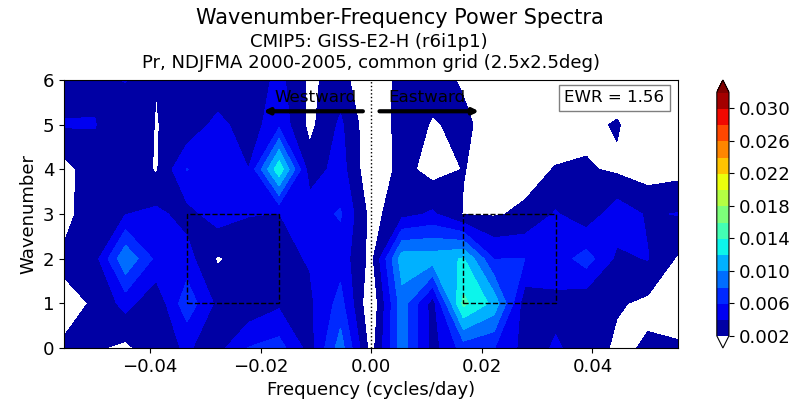

In [6]:
from IPython.display import Image
Image(filename=demo_output_directory+"/mjo/Ex2/cmip5_GISS-E2-H_historical_r6i1p1_mjo_2000-2005_NDJFMA_cmmGrid.png")